In [1235]:
from bs4 import BeautifulSoup
import bs4
import time
import os
import pandas as pd
from scipy import stats
import scipy as sc
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import svm
from scipy.special import expit
from scipy.special import logit
import requests
global pages
pd.options.mode.chained_assignment = None
from sklearn.model_selection import cross_val_score



In [1236]:
#load Csv (post Crawled) + fix
df = pd.read_csv(r'D:\לימודים יניב\שנה ב\מבוא למדעי הנתונים-שיטות וכלים\Project\DataFrameTableTeam.csv')
#df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [1237]:
#Drop outliers (last season is still running)
df = df.drop(df[df['Year']=='2020/2021'].index)

In [1238]:
#duplicates Check
df = df.drop_duplicates()
#display(df)

In [1239]:
for i in df:
    df[i] = df[i].replace('-','0')
#df['Matches lost'].value_counts()

In [1240]:
#null Check
df.isnull().value_counts()

#      Clubs  Matches played  Matches won  Matches drawn  Matches lost  Goals for  Goals against  Goal difference  Points  Year 
False  False  False           False        False          False         False      False          False            False   False    566
dtype: int64

In [1241]:
#from Team Names to Indexes
teams=df['Clubs'].value_counts().index.tolist() 
dicNew={}
for i in range(len(teams)):
    dicNew[teams[i]]=i+1
df2 = df.replace({"Clubs":dicNew})

In [1242]:
#Change Place by 2 groups , Top 5 = 1, Other = 0
df2['Place'] = df2['#']
dicChange={}
x=df2['#'].value_counts().index.tolist()
x=sorted(x,key=int)
x = list(map(int, x))
for i in (x):
    if(i<6):
        dicChange[i]=1
    else:
        dicChange[i]=0
df2['Place'] = list(map(int,df2['Place']))
df2 = df2.replace({'Place':dicChange})



In [1243]:
for i in df2:
    if(i!='Year'):
        df2[i] = list(map(int,df2[i]))
df2['Year'].value_counts()

1992/1993    22
1994/1995    22
1993/1994    22
2010/2011    20
2017/2018    20
2004/2005    20
1996/1997    20
1995/1996    20
2013/2014    20
2019/2020    20
2015/2016    20
2018/2019    20
2000/2001    20
2007/2008    20
2016/2017    20
1998/1999    20
2006/2007    20
2002/2003    20
2009/2010    20
2005/2006    20
1997/1998    20
2014/2015    20
2011/2012    20
1999/2000    20
2012/2013    20
2001/2002    20
2008/2009    20
2003/2004    20
Name: Year, dtype: int64

In [1244]:
#df2['Clubs'].value_counts()
#DFCHECK = df2.drop(df2[df2['Clubs']!=6].index)
#display(DFCHECK['Goals for'].sum(),DFCHECK['Matches won'].sum(),DFCHECK['Points'].sum())
#DFCHECK['#'].value_counts()

In [1245]:
#Only the team in top 5 place
FirstPlaces = df2.drop(df2[df2['Place']!=1].index)
FirstPlaces = FirstPlaces[:len(FirstPlaces)]
display(FirstPlaces)

,#,Clubs,Matches played,Matches won,Matches drawn,Matches lost,Goals for,Goals against,Goal difference,Points,Year,Place
0,1,4,42,24,12,6,67,31,36,84,1992/1993,1
1,2,8,42,21,11,10,57,40,17,74,1992/1993,1
2,3,22,42,21,9,12,61,65,-4,72,1992/1993,1
3,4,12,42,20,11,11,68,46,22,71,1992/1993,1
4,5,33,42,17,12,13,63,55,8,63,1992/1993,1
...,...,...,...,...,...,...,...,...,...,...,...,...
546,1,1,38,32,3,3,85,33,52,99,2019/2020,1
547,2,10,38,26,3,9,102,35,67,81,2019/2020,1
548,3,4,38,18,12,8,66,36,30,66,2019/2020,1
549,4,6,38,20,6,12,69,54,15,66,2019/2020,1


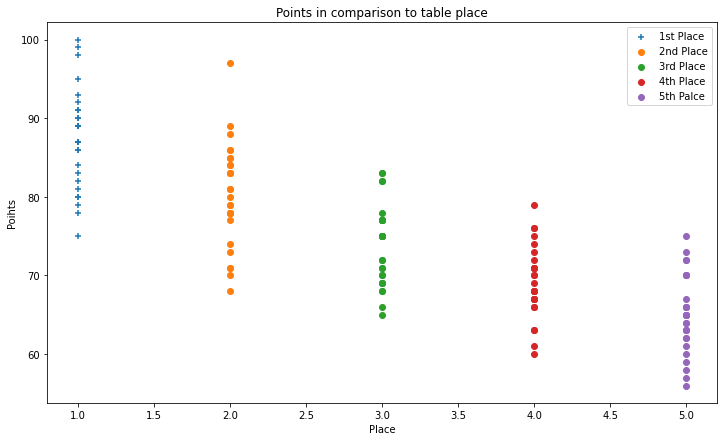

In [1246]:
P1 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=1].index)
P2 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=2].index)
P3 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=3].index)
P4 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=4].index)
P5 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=5].index)
plt.figure(figsize=(12,7))
plt.title('Points in comparison to table place')
plt.xlabel('Place')
plt.ylabel('Poihts')
plt.scatter(P1['#'],P1['Points'],marker='+')
plt.scatter(P2['#'],P2['Points'])
plt.scatter(P3['#'],P3['Points'])
plt.scatter(P4['#'],P4['Points'])
plt.scatter(P5['#'],P5['Points'])
plt.legend(['1st Place','2nd Place','3rd Place','4th Place','5th Palce'])
plt.show()

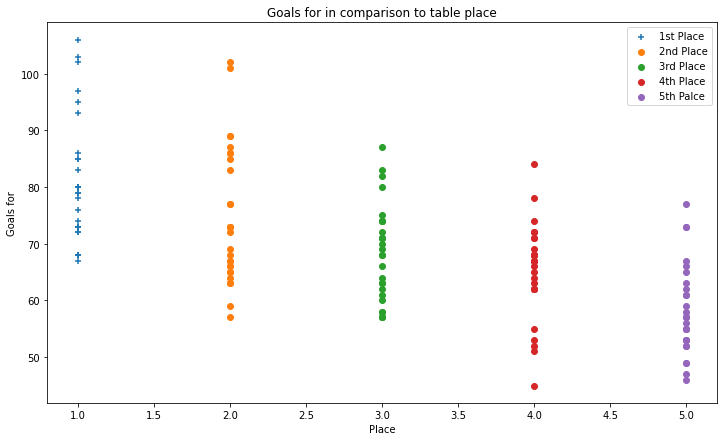

In [1247]:
P1 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=1].index)
P2 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=2].index)
P3 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=3].index)
P4 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=4].index)
P5 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=5].index)
plt.figure(figsize=(12,7))
plt.title('Goals for in comparison to table place')
plt.xlabel('Place')
plt.ylabel('Goals for')
plt.scatter(P1['#'],P1['Goals for'],marker='+')
plt.scatter(P2['#'],P2['Goals for'])
plt.scatter(P3['#'],P3['Goals for'])
plt.scatter(P4['#'],P4['Goals for'])
plt.scatter(P5['#'],P5['Goals for'])
plt.legend(['1st Place','2nd Place','3rd Place','4th Place','5th Palce'])
plt.show()

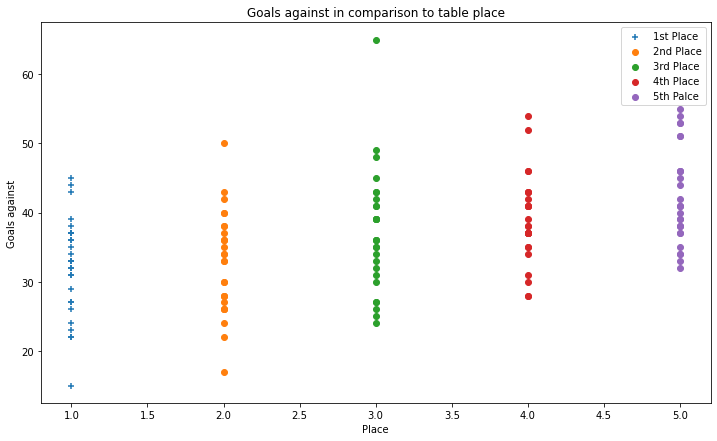

In [1248]:
P1 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=1].index)
P2 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=2].index)
P3 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=3].index)
P4 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=4].index)
P5 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=5].index)
plt.figure(figsize=(12,7))
plt.title('Goals against in comparison to table place')
plt.xlabel('Place')
plt.ylabel('Goals against')
plt.scatter(P1['#'],P1['Goals against'],marker='+')
plt.scatter(P2['#'],P2['Goals against'])
plt.scatter(P3['#'],P3['Goals against'])
plt.scatter(P4['#'],P4['Goals against'])
plt.scatter(P5['#'],P5['Goals against'])
plt.legend(['1st Place','2nd Place','3rd Place','4th Place','5th Palce'])
plt.show()

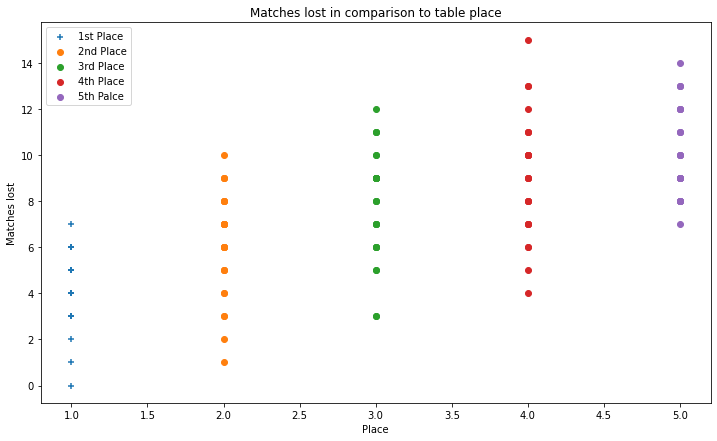

In [1249]:
P1 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=1].index)
P2 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=2].index)
P3 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=3].index)
P4 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=4].index)
P5 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=5].index)
plt.figure(figsize=(12,7))
plt.title('Matches lost in comparison to table place')
plt.xlabel('Place')
plt.ylabel('Matches lost')
plt.scatter(P1['#'],P1['Matches lost'],marker='+')
plt.scatter(P2['#'],P2['Matches lost'])
plt.scatter(P3['#'],P3['Matches lost'])
plt.scatter(P4['#'],P4['Matches lost'])
plt.scatter(P5['#'],P5['Matches lost'])
plt.legend(['1st Place','2nd Place','3rd Place','4th Place','5th Palce'])
plt.show()

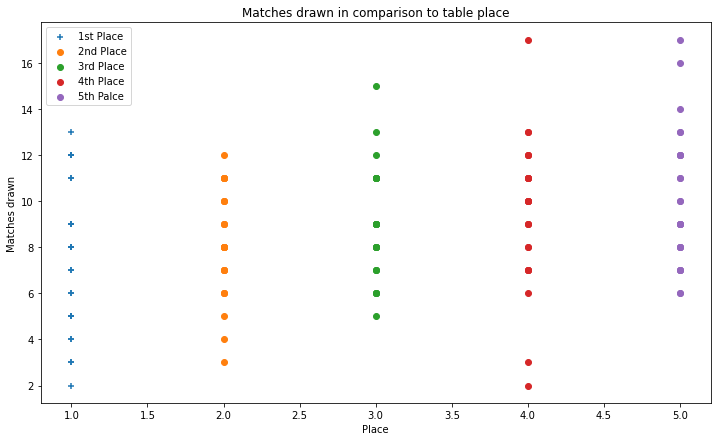

In [1250]:
P1 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=1].index)
P2 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=2].index)
P3 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=3].index)
P4 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=4].index)
P5 = FirstPlaces.drop(FirstPlaces[FirstPlaces['#']!=5].index)
plt.figure(figsize=(12,7))
plt.title('Matches drawn in comparison to table place')
plt.xlabel('Place')
plt.ylabel('Matches drawn')
plt.scatter(P1['#'],P1['Matches drawn'],marker='+')
plt.scatter(P2['#'],P2['Matches drawn'])
plt.scatter(P3['#'],P3['Matches drawn'])
plt.scatter(P4['#'],P4['Matches drawn'])
plt.scatter(P5['#'],P5['Matches drawn'])
plt.legend(['1st Place','2nd Place','3rd Place','4th Place','5th Palce'])
plt.show()

In [1251]:
X=pd.DataFrame()

In [1252]:
#Predicting minimum 'x' Goals for, Goal differences , Points required to be top 5
#df_club = df2.drop(df2[df2.Clubs!=3].index)
list_values = []
list_check = ['Goals for','Goal difference','Points','Matches won']
for i in list_check:
    X[i]=df2[i]
    y=df2['Place']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    lrm=linear_model.LogisticRegression()
    lrm.fit(X_train,y_train)
    lrm.score(X_test,y_test)
    y_pred = lrm.predict(X)
    X=X.drop(i,axis=1)
    for j in range(-100,150):
        if (lrm.predict([[j]])[0]==1):
            list_values.append(j)
            break
for k in range(len(list_check)):
    print("for the team to be top 5 it has to have atleast",list_values[k],list_check[k])

for the team to be top 5 it has to have atleast 62 Goals for
for the team to be top 5 it has to have atleast 18 Goal difference
for the team to be top 5 it has to have atleast 64 Points
for the team to be top 5 it has to have atleast 18 Matches won


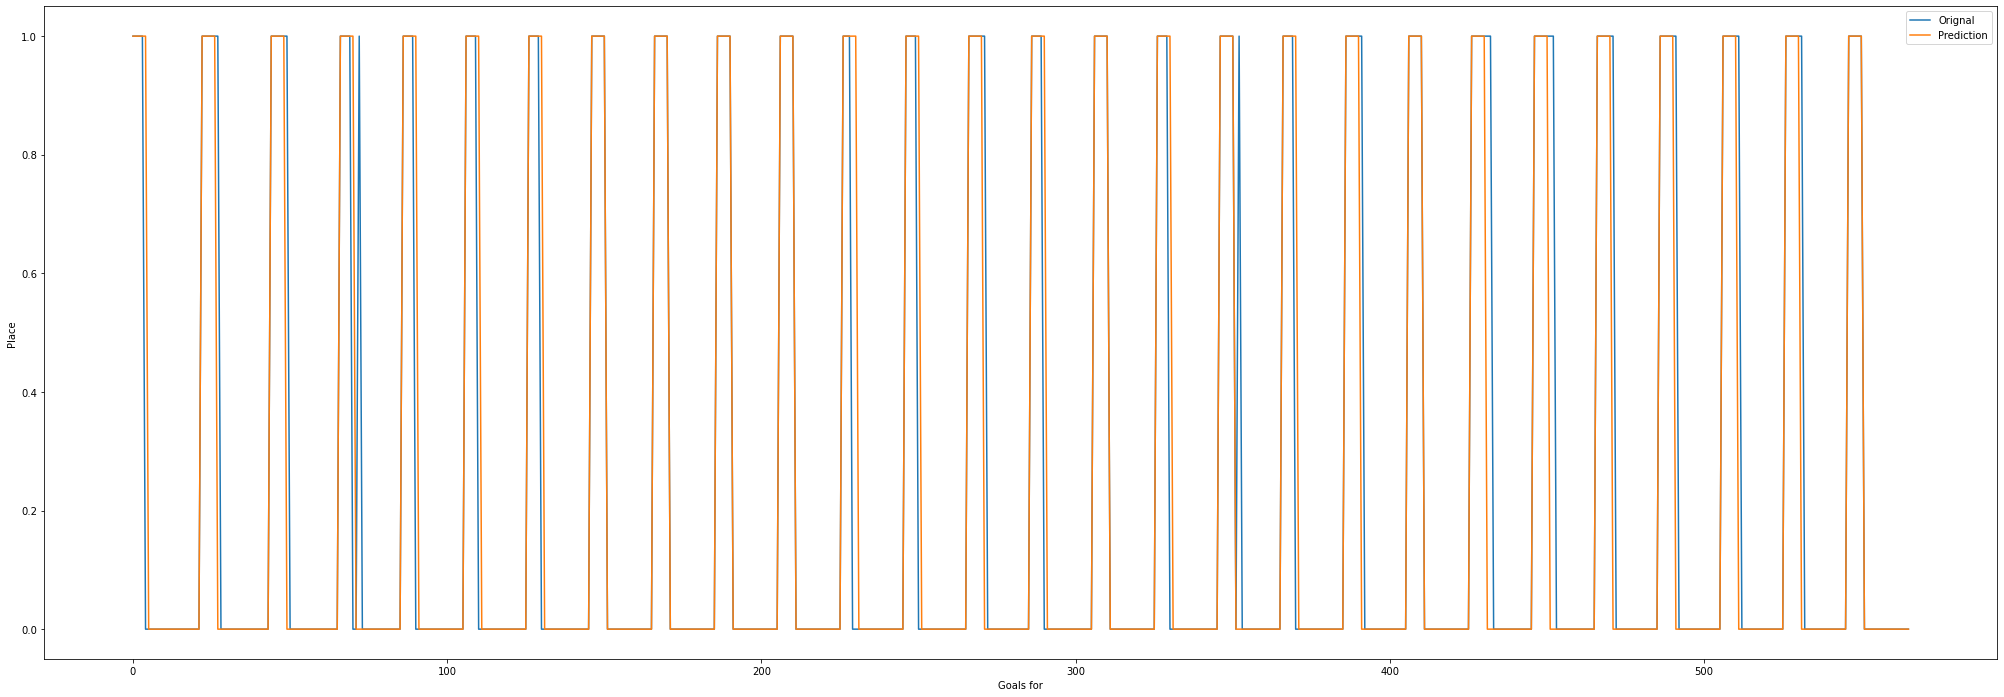

In [1253]:
y = np.array(y)
y_pred = np.array(y_pred)
plt.figure(figsize=(35,12))
plt.title("")
plt.xlabel('Goals for')
plt.ylabel('Place')
plt.plot(y_pred)
plt.plot(y)
plt.legend(['Orignal','Prediction'])
plt.show()

In [1254]:

df_small = df2.drop(df2[df2.Clubs!=4].index)

#making the x,y
#x=df_small.drop(['Matches won','Goals against','Year','Clubs','Matches played','Matches lost','Points','Goal difference'],axis=1)
x=df_small.drop(['Year','Matches played','Clubs'],axis=1)
y=df_small['Points']

#Logistic Linear
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
lrm=linear_model.LogisticRegression()
lrm.fit(X_train,y_train)
y_pred = lrm.predict(x)
y_actual=y
    
print(lrm.score(X_test,y_test))
metrics.confusion_matrix(y_actual, y_pred)
print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
print("precision is:",metrics.precision_score(y_actual, y_pred,average='macro'))
print("recall is:",metrics.recall_score(y_actual, y_pred,average='macro'))
print("f1 is:",metrics.f1_score(y_actual, y_pred,average='macro'))
print(list(dicNew.keys())[list(dicNew.values()).index(4)])

0.0
accuracy is: 0.6428571428571429
precision is: 0.5359649122807018
recall is: 0.5964912280701754
f1 is: 0.5354636591478696
Manchester United


C:\Users\Yaniv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yaniv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


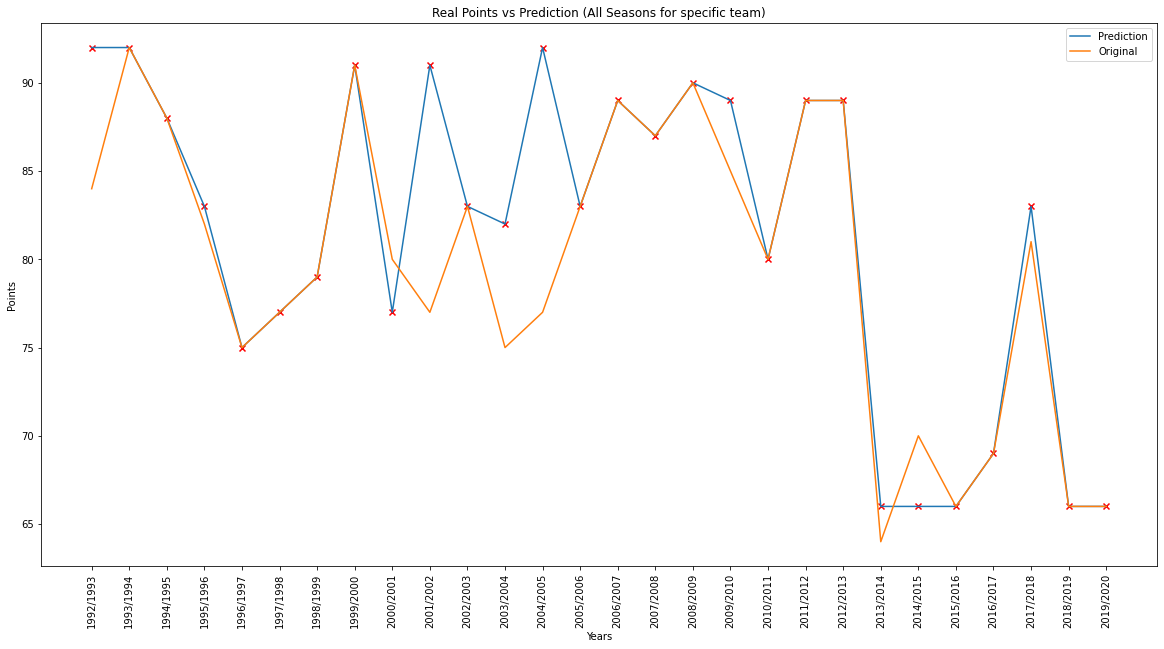

In [1255]:
y = np.array(y)
y_pred = np.array(y_pred)
plt.figure(figsize=(20,10))
plt.title("Real Points vs Prediction (All Seasons for specific team)")
plt.xlabel('Years')
plt.ylabel('Points')
plt.plot(y_pred)
plt.plot(y)
plt.legend(['Prediction','Original'])
plt.scatter(df_small['Year'],y_pred,marker='x',c='r')
plt.xticks(rotation = 90)
plt.show()


In [1256]:
#SVC model
clf=SVC()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(clf.predict(x))
print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
print("precision is:",metrics.precision_score(y_actual, y_pred,average='macro',zero_division=0))
print("recall is:",metrics.recall_score(y_actual, y_pred,average='macro'))
print("f1 is:",metrics.f1_score(y_actual, y_pred,average='macro'))
name =list(dicNew.keys())[list(dicNew.values()).index(4)]
print(name)

0.0
[89 89 89 89 66 89 89 89 89 89 89 66 66 89 89 89 89 89 89 89 89 66 66 66
 66 89 66 66]
accuracy is: 0.6428571428571429
precision is: 0.5359649122807018
recall is: 0.5964912280701754
f1 is: 0.5354636591478696
Manchester United


In [1257]:
#Choosing only one Team that played for all 29 seasons (28, Season29 not finished)
dfMU = df2.drop(df2[df2.Clubs!=4].index)
df_len = len(dfMU)
dfMU



,#,Clubs,Matches played,Matches won,Matches drawn,Matches lost,Goals for,Goals against,Goal difference,Points,Year,Place
0,1,4,42,24,12,6,67,31,36,84,1992/1993,1
22,1,4,42,27,11,4,80,38,42,92,1993/1994,1
45,2,4,42,26,10,6,77,28,49,88,1994/1995,1
66,1,4,38,25,7,6,73,35,38,82,1995/1996,1
86,1,4,38,21,12,5,76,44,32,75,1996/1997,1
107,2,4,38,23,8,7,73,26,47,77,1997/1998,1
126,1,4,38,22,13,3,80,37,43,79,1998/1999,1
146,1,4,38,28,7,3,97,45,52,91,1999/2000,1
166,1,4,38,24,8,6,79,31,48,80,2000/2001,1
188,3,4,38,24,5,9,87,45,42,77,2001/2002,1


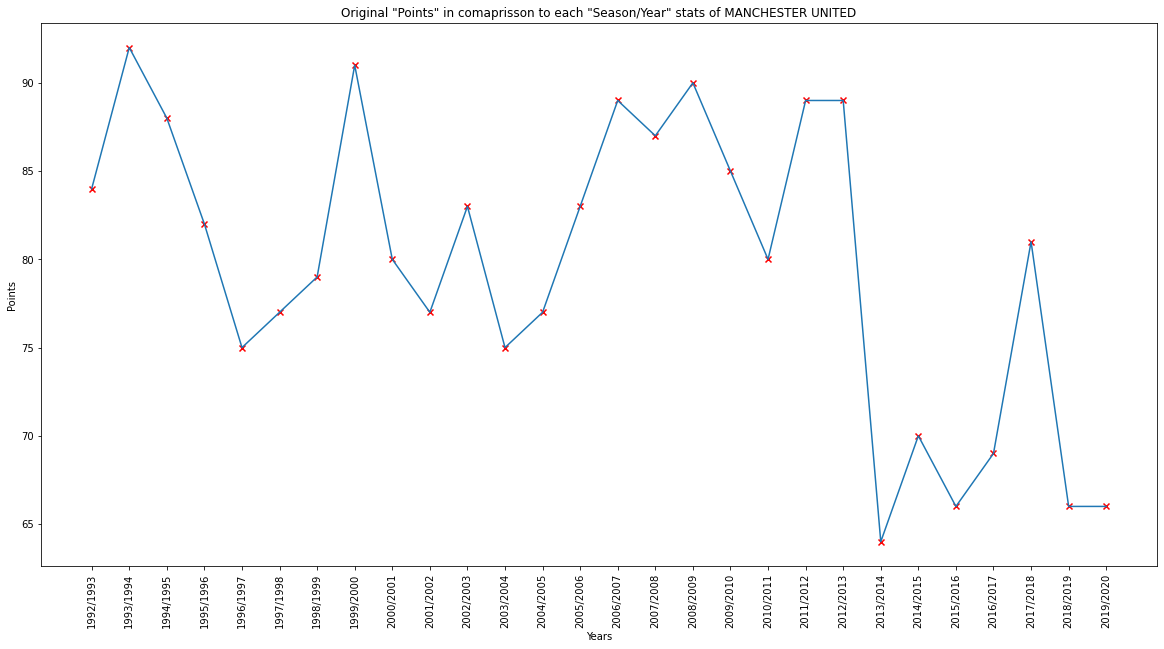

In [1258]:
#Visualize the 'Points' data
plt.figure(figsize=(20,10))
plt.title('Original "Points" in comaprisson to each "Season/Year" stats of MANCHESTER UNITED')
plt.xlabel('Years')
plt.ylabel('Points')
plt.plot(dfMU['Year'],dfMU['Points'])
plt.scatter(dfMU['Year'],dfMU['Points'],marker='x',c='r')
plt.xticks(rotation = 90)
plt.show()

In [1259]:
#Get The Points
dfMUPre = pd.DataFrame()
dfMUPre['Points'] = dfMU['Points']
display(dfMUPre)

,Points
0,84
22,92
45,88
66,82
86,75
107,77
126,79
146,91
166,80
188,77


In [1260]:
#Create a variable to predict 'x' seasons (5)
future_seasons = 7
#Create a new column target
dfMUPre['Prediction'] = dfMUPre[['Points']].shift(-future_seasons)
dfMUPre

,Points,Prediction
0,84,91.0
22,92,80.0
45,88,77.0
66,82,83.0
86,75,75.0
107,77,77.0
126,79,83.0
146,91,89.0
166,80,87.0
188,77,90.0


In [1261]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/seasons
X = np.array(dfMUPre.drop(['Prediction'],axis=1))[:-future_seasons]

In [1262]:
##Create a target data set (y) and convert it to a numpy array and remove all the values expect last 'x' rows/seasons
y = np.array(dfMUPre['Prediction'])[:-future_seasons]

In [1263]:
#Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1264]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(X_train,y_train)
#Create the linear regression model
lr = LinearRegression().fit(X_train,y_train)

In [1265]:
#Get the last 'x' row/seasons from the feature data set
x_future = dfMUPre.drop(['Prediction'],1)[:-future_seasons]
x_future = x_future.tail(future_seasons)
x_future = np.array(x_future)

In [1266]:
x_future

array([[89],
       [87],
       [90],
       [85],
       [80],
       [89],
       [89]], dtype=int64)

In [1267]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print("tree model  ",tree_prediction)
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print("linear model",lr_prediction)

tree model   [65.33333333 77.         66.         87.         81.         65.33333333
 65.33333333]
linear model [73.71097648 75.63114754 72.75089095 77.5513186  82.35174626 73.71097648
 73.71097648]


In [1269]:
valid['Points']

432    64
449    70
470    66
491    69
507    81
531    66
548    66
Name: Points, dtype: int64

In [1268]:
print(dfMUPre.index)

Int64Index([  0,  22,  45,  66,  86, 107, 126, 146, 166, 188, 206, 228, 248,
            267, 286, 306, 326, 347, 366, 387, 406, 432, 449, 470, 491, 507,
            531, 548],
           dtype='int64')


In [ ]:
#Visualize the data with Tree model
predictions = tree_prediction
valid = dfMUPre[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Points vs Predcition Points')
plt.xlabel('Season')
plt.ylabel('Points')
plt.plot(dfMUPre['Points'])
plt.plot(valid[['Points','Prediction']])
plt.legend(['Orignal', 'Valid', 'Prediction'])
plt.scatter(valid.index,valid['Prediction'],marker='x',c='r')
plt.xticks(rotation = 90)
plt.show()
#tree model prediction accuracy
x=0
total_accuracy=0
print("                                           tree model prediction accuracy")
for i in valid['Points']:
    total_accuracy+=(i*100)/tree_prediction[x]
    x+=1
print("                                          ",total_accuracy/future_seasons,"%")
#print("r2_score prediction=",metrics.r2_score(y_test, predictions)*100,"%")

In [ ]:
#Visualize the data with Linear regression model
predictions = lr_prediction
valid = dfMUPre[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Points vs Predcition Points')
plt.xlabel('Season')
plt.ylabel('Points')
plt.plot(dfMUPre['Points'])
plt.plot(valid[['Points','Prediction']])
plt.legend(['Orignal', 'Valid', 'Prediction'])
plt.scatter(valid.index,valid['Prediction'],marker='x',c='r')
plt.show()
#Linear model prediction accuracy
x=0
total_accuracy=0
print("                                           Linear model prediction accuracy")
for i in valid['Points']:
    total_accuracy+=(i*100)/lr_prediction[x]
    x+=1
print("                                          ",total_accuracy/future_seasons ,"%")
#print("r2_score prediction=",metrics.r2_score(y_test, predictions)*100,"%")

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
print("linear pre=",lr_prediction)
print("tree pre=",tree_prediction)
valid

In [ ]:
#Linear model prediction accuracy
x=0
total_accuracy=0
print("Linear model prediction accuracy")
for i in valid['Points']:
    total_accuracy+=(i*100)/lr_prediction[x]
    x+=1
print(total_accuracy/future_seasons ,"%")

In [ ]:
#tree model prediction accuracy
x=0
total_accuracy=0
print("tree model prediction accuracy")
for i in valid['Points']:
    total_accuracy+=(i*100)/tree_prediction[x]
    x+=1
print(total_accuracy/future_seasons,"%")

In [ ]:
#Cross validation
csX = df2[['Goals for','Points']]
csY = df2['Place']
X_train, X_test, y_train, y_test = train_test_split(csX, csY, test_size=0.3, random_state=42)


In [ ]:
X_train.shape , y_train.shape

In [ ]:
X_test.shape , y_test.shape

In [ ]:
clf = SVC(kernel='linear',C=1).fit(X_train,y_train)
clf.score(X_test,y_test)

In [ ]:
clf.score(X_train,y_train)

In [ ]:
clf = SVC(kernel='linear',C=1)
scores = cross_val_score(clf, csX,csY, cv=5)
scores

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

In [1226]:
#Linear Regression for all the seasons , prediciting the final teams place
dfLinear = pd.DataFrame()
dfLinear = df2.drop(['#','Year','Place','Matches played'],axis=1)
y=df2['#']
X_train, X_test, y_train, y_test = train_test_split(dfLinear, y, test_size=0.3, random_state=42)
dfln = LinearRegression().fit(X_train,y_train)
dfln.score(X_test,y_test)
y_pred = dfln.predict(dfLinear)


In [1227]:
print("score:",dfln.score(X_test,y_test))
print("explained_variance_score:", metrics.explained_variance_score(y, y_pred,multioutput='uniform_average'))

score: 0.8975547455758685
explained_variance_score: 0.8916554810740761


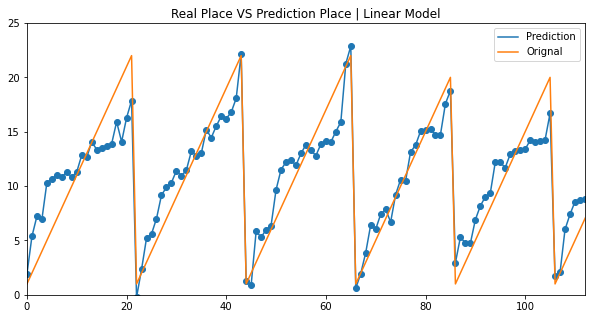

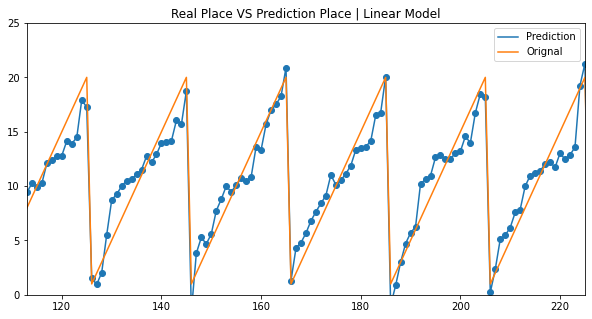

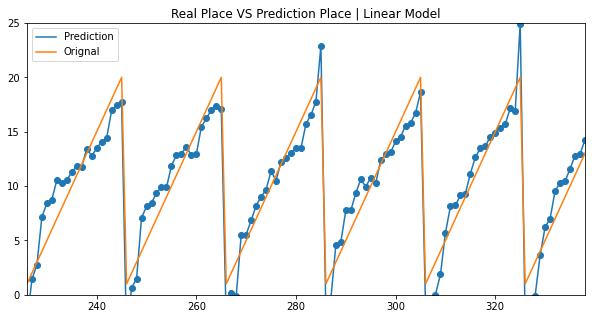

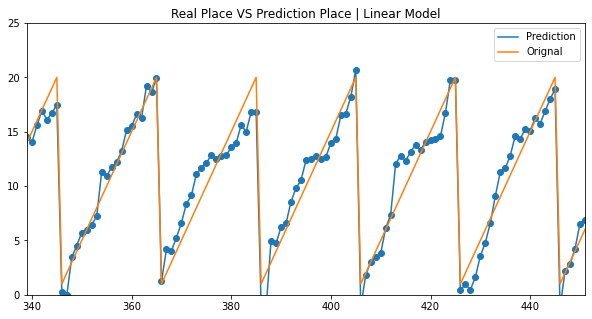

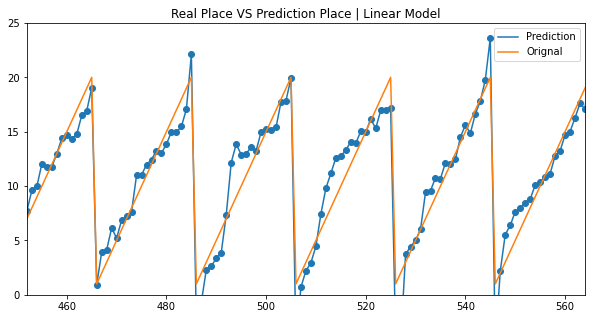

In [1228]:
#Linear BIG GRAPH(5)
YY = df2['#']
x=113
for i in range(5):
    plt.figure(figsize=(10,5))
    plt.title('Real Place VS Prediction Place | Linear Model')
    plt.xlabel('')
    plt.ylabel('')
    plt.plot(y_pred)
    plt.plot(YY)
    plt.xlim(x*i,x+(x*i-1))
    plt.ylim(0,25)
    plt.legend(['Prediction','Orignal'])
    plt.scatter(YY.index,y_pred)
    plt.show()



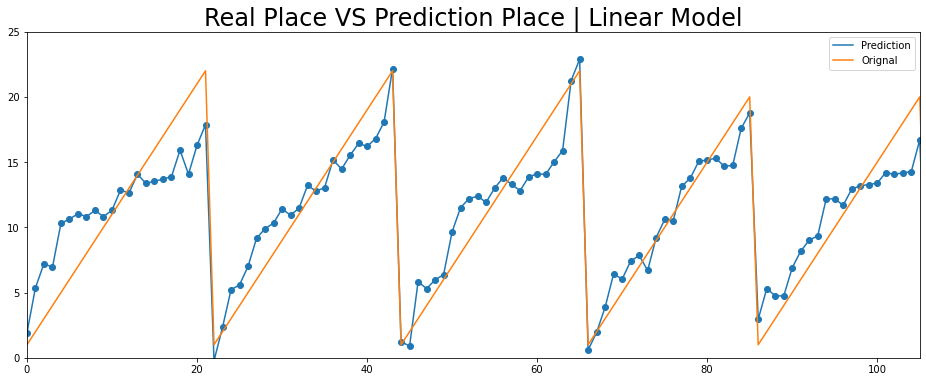

In [1231]:
#Linear 0:105
YY = df2['#']
plt.figure(figsize=(16,6))
plt.title('Real Place VS Prediction Place | Linear Model',fontsize=24)
plt.xlabel('')
plt.ylabel('')
plt.plot(y_pred)
plt.plot(YY)
plt.xlim(0,105)
plt.ylim(0,25)
plt.legend(['Prediction','Orignal'])
plt.scatter(YY.index,y_pred)
plt.show()

In [ ]:
#Linear ALL GRAPH
plt.figure(figsize=(36,10))
plt.title('Real Place VS Prediction Place | Linear Model',fontsize=24)
plt.xlabel('')
plt.ylabel('')
plt.plot(y_pred)
plt.plot(YY)
plt.legend(['Prediction','Orignal'])
plt.scatter(YY.index,y_pred,c=YY)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.colorbar()
plt.show()

In [1232]:
#Dicision Tree Regression for all the seasons , prediciting the final teams place
X_train, X_test, y_train, y_test = train_test_split(dfLinear, y, test_size=0.3, random_state=42)
tree = DecisionTreeRegressor().fit(X_train,y_train)
print(tree.score(X_test,y_test))
print("explained_variance_score:", metrics.explained_variance_score(y, y_pred,multioutput='uniform_average'))
y_pred = tree.predict(dfLinear)


0.8975878977903764
explained_variance_score: 0.8916554810740761


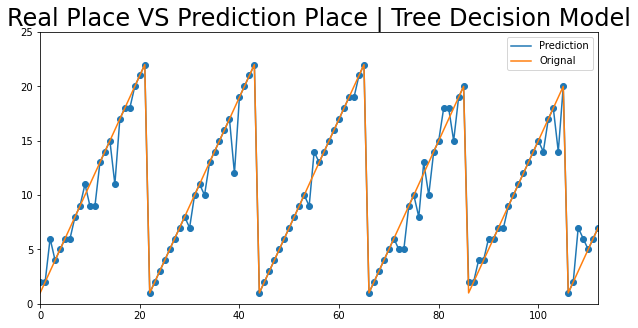

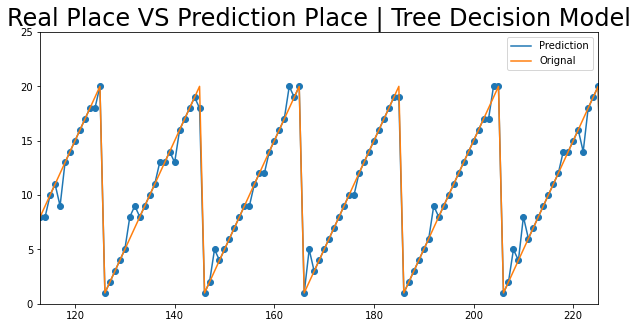

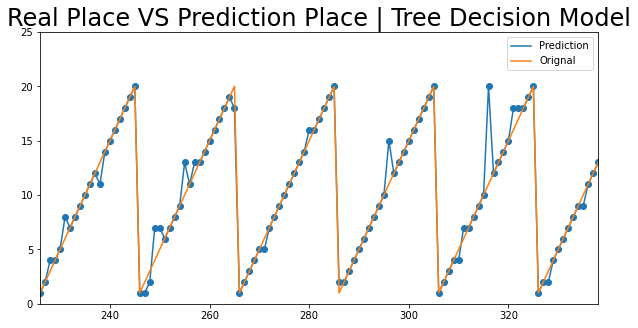

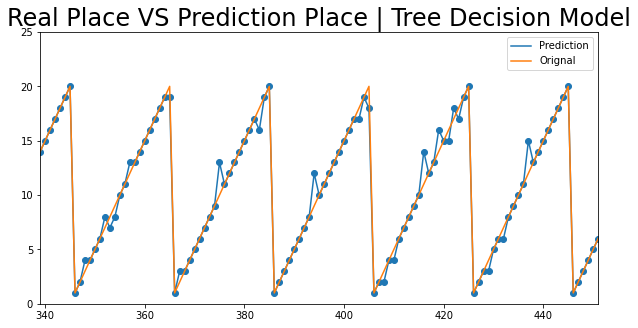

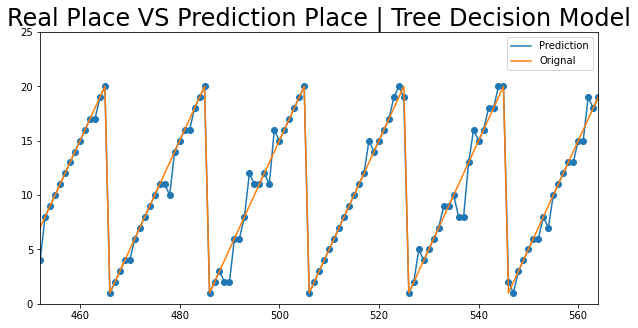

In [1233]:
#Tree BIG GRAPH(5)
YY = df2['#']
x=113
for i in range(5):
    plt.figure(figsize=(10,5))
    plt.title('Real Place VS Prediction Place | Tree Decision Model',fontsize=24)
    plt.xlabel('')
    plt.ylabel('')
    plt.plot(y_pred)
    plt.plot(YY)
    plt.xlim(x*i,x+(x*i-1))
    plt.ylim(0,25)
    plt.legend(['Prediction','Orignal'])
    plt.scatter(YY.index,y_pred)
    plt.show()

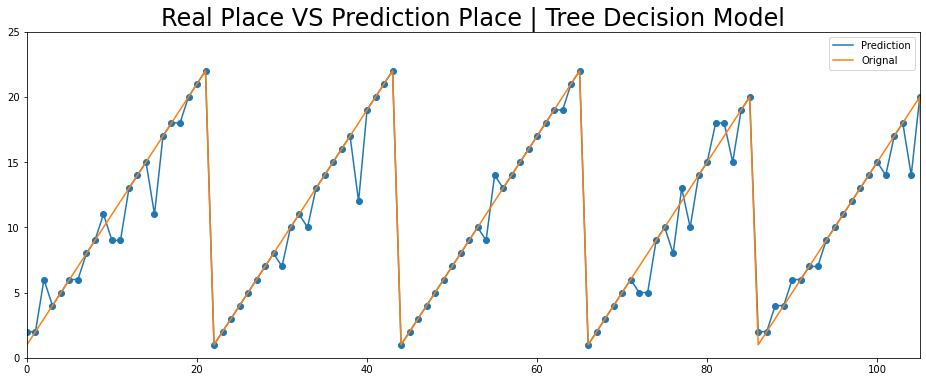

In [1234]:
#Tree 0:105
YY = df2['#']
x=113
plt.figure(figsize=(16,6))
plt.title('Real Place VS Prediction Place | Tree Decision Model',fontsize=24)
plt.xlabel('')
plt.ylabel('')
plt.plot(y_pred)
plt.plot(YY)
plt.xlim(0,105)
plt.ylim(0,25)
plt.legend(['Prediction','Orignal'])
plt.scatter(YY.index,y_pred)
plt.show()

In [ ]:
#Tree ALL GRAPH
plt.figure(figsize=(36,10))
plt.title('Real Place VS Prediction Place | Tree Decision Model',fontsize=24)
plt.xlabel('')
plt.ylabel('')
plt.plot(y_pred)
plt.plot(YY)
plt.legend(['Prediction','Orignal'])
plt.scatter(YY.index,y_pred,c=YY)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.colorbar()
plt.show()